### Student Information
Name:

Student ID:

GitHub ID:

Kaggle name:

Kaggle private scoreboard snapshot:

[Snapshot](img/pic0.png)

---

### Instructions

1. First: __This part is worth 30% of your grade.__ Do the **take home** exercises in the [DM2020-Lab2-Master Repo](https://github.com/fhcalderon87/DM2020-Lab2-Master). You may need to copy some cells from the Lab notebook to this notebook. 


2. Second: __This part is worth 30% of your grade.__ Participate in the in-class [Kaggle Competition](https://www.kaggle.com/c/dm2020-hw2-nthu/) regarding Emotion Recognition on Twitter. The scoring will be given according to your place in the Private Leaderboard ranking: 
    - **Bottom 40%**: Get 20% of the score (ie. 20% of 30% )

    - **Top 41% - 100%**: Get (101-x)% of the score, where x is your ranking in the leaderboard (ie. (101-x)% of 30% )   
    Submit your last submission __BEFORE the deadline (Dec. 5th 11:59 pm, Saturday)__. Make sure to take a screenshot of your position at the end of the competition and store it as '''pic0.png''' under the **img** folder of this repository and rerun the cell **Student Information**.
    

3. Third: __This part is worth 30% of your grade.__ A report of your work developping the model for the competition (You can use code and comment it). This report should include what your preprocessing steps, the feature engineering steps and an explanation of your model. You can also mention different things you tried and insights you gained. 


4. Fourth: __This part is worth 10% of your grade.__ It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**.


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fhcalderon87/DM2020-Lab1-Master/blob/master/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb), but make sure to fork the [DM2020-Lab2-Homework](https://github.com/fhcalderon87/DM2020-Lab2-Homework) repository this time! Also please __DON´T UPLOAD HUGE DOCUMENTS__, please use Git ignore for that.

Make sure to commit and save your changes to your repository __BEFORE the deadline (Dec. 8th 11:59 pm, Tuesday)__. 

In [1]:
### Begin Assignment Here

---
### ** >>> Exercise 1 (Take home): **  
Plot word frequency for Top 30 words in both train and test dataset. (Hint: refer to DM lab 1)

In [2]:
import pandas as pd
import pickle
from sklearn.feature_extraction.text import CountVectorizer

from helpers import data_mining_helpers as dmh

train_df = pd.read_pickle('./data/train_df.pkl')
test_df = pd.read_pickle('./data/test_df.pkl')

train_df['unigrams'] = train_df['text'].apply(lambda x: dmh.tokenize_text(x, remove_stopwords=True, remove_punctuation=True))
test_df['unigrams'] = test_df['text'].apply(lambda x: dmh.tokenize_text(x, remove_stopwords=True, remove_punctuation=True))

count_vect = CountVectorizer(stop_words='english')
count_vect.fit(train_df.text)
train_counts = count_vect.transform(train_df.text)
test_counts = count_vect.transform(test_df.text)

In [3]:
train_word_count = pd.DataFrame(columns=count_vect.get_feature_names(), data=train_counts.toarray())
test_word_count = pd.DataFrame(columns=count_vect.get_feature_names(), data=test_counts.toarray())

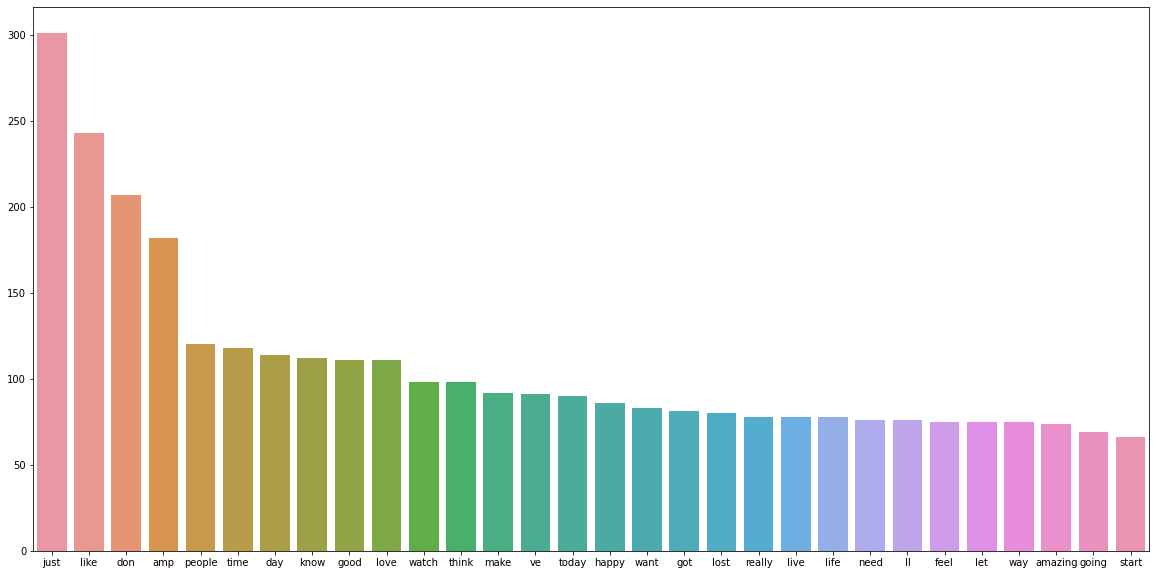

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

train_word_fequency = train_word_count.sum(axis=0).sort_values(ascending=False)[:30]
ax = sns.barplot(x=train_word_fequency.index, y=train_word_fequency)
ax.figure.set_size_inches(20,10)

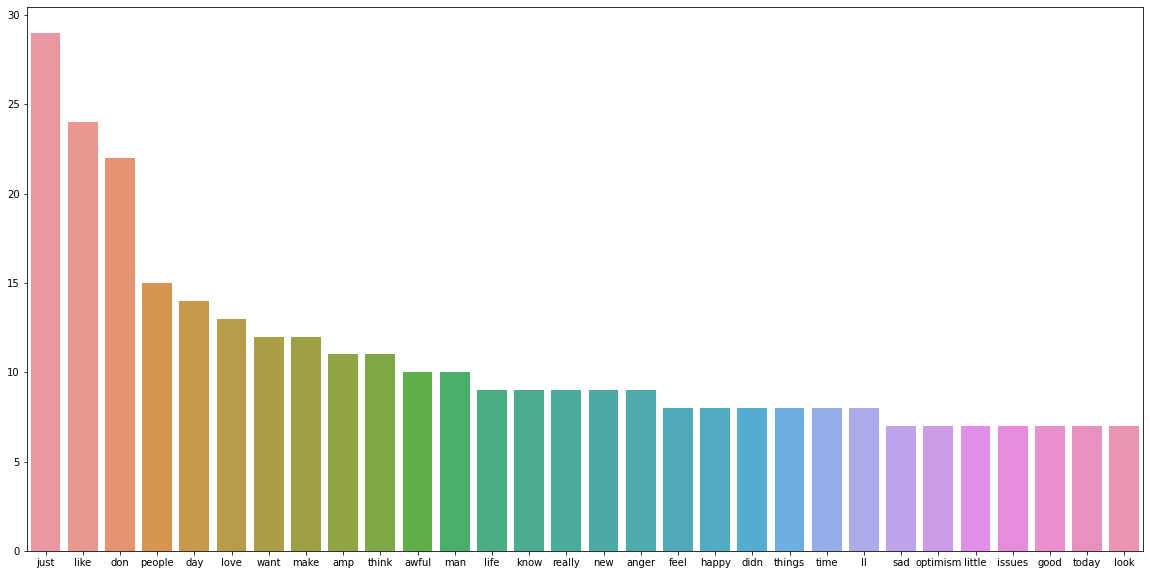

In [5]:
test_word_fequency = test_word_count.sum(axis=0).sort_values(ascending=False)[:30]
ax = sns.barplot(x=test_word_fequency.index, y=test_word_fequency)
ax.figure.set_size_inches(20,10)

---
### ** >>> Exercise 2 (Take home): **  
Generate an embedding using the TF-IDF vectorizer instead of th BOW one with 1000 features and show the feature names for features [100:110].

In [6]:
from sklearn.feature_extraction.text import TfidfVectorizer
import nltk

# build analyzers (td-idf)
TDIDF_1000 = TfidfVectorizer(max_features=1000, tokenizer=nltk.word_tokenize) 

# apply analyzer to training data
TDIDF_1000.fit(train_df['text'])
TDIDF_1000.get_feature_names()[100:110]

/home/manu/PycharmProjects/data_mining/venv/lib/python3.8/site-packages/sklearn/feature_extraction/text.py:484: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn("The parameter 'token_pattern' will not be used"


['awareness',
 'away',
 'awe',
 'awesome',
 'awful',
 'b',
 'baby',
 'back',
 'bad',
 'ball']

![confusion](pics/confusion.png)

---
### ** >>> Exercise 3 (Take home): **  
Can you interpret the results above? What do they mean?

Note: I believe the axis labels of the image above are inverted; usually the 'True label' axis is the vertical one and the 'Predicted label' axis is the horizontal one. This is true also here: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.plot_confusion_matrix.html#sklearn.metrics.plot_confusion_matrix
Plotting the Decision Tree's evaluation results using the scikit-learn method produces an output that confirms what I'm stating here. (Plot included below)

A confusion matrix for multiclass classification shows the number of predictions split by class.
The values on the diagonal are true positives for a class - i.e. the number of times that class has been predicted correctly.
From the matrix above we can see that the class 'fear' has been predicted right more than the others, although the class ditribution showed that 'fear' occurs more times than the other classes. We can also see that some classes are discerned better than others - e.g. 3 times we predicted 'sadness' when it really was 'anger' and 8 times the inverse, while 12 times we predicted 'fear' when it really was 'anger' and 15 times the inverse, hinting that perhaps 'fear' is harder to discrimnate from 'anger' than 'sadness' is). In any case, the effect is too small to be a real cause of concern.


![confusion_2](pics/confusion_2.png)

---
### ** >>> Exercise 4 (Take home): **  
Build a model using a ```Naive Bayes``` model and train it. What are the testing results? 

*Reference*: https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.MultinomialNB.html

X_train.shape:  (3613, 1000)
y_train.shape:  (3613,)
X_test.shape:  (347, 1000)
y_test.shape:  (347,)
----------------------------
training accuracy: 0.9
testing accuracy: 0.78
----------------------------
              precision    recall  f1-score   support

       anger       0.77      0.77      0.77        84
        fear       0.72      0.84      0.78       110
         joy       0.85      0.78      0.82        79
     sadness       0.79      0.68      0.73        74

    accuracy                           0.78       347
   macro avg       0.79      0.77      0.77       347
weighted avg       0.78      0.78      0.77       347



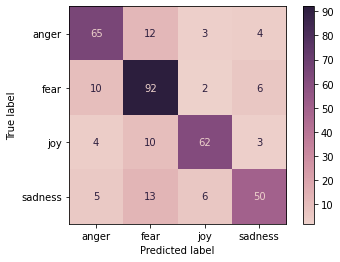

In [7]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import plot_confusion_matrix

X_train = TDIDF_1000.transform(train_df['text'])
y_train = train_df['emotion']

X_test = TDIDF_1000.transform(test_df['text'])
y_test = test_df['emotion']

print('X_train.shape: ', X_train.shape)
print('y_train.shape: ', y_train.shape)
print('X_test.shape: ', X_test.shape)
print('y_test.shape: ', y_test.shape)
print('----------------------------')

MNB_model = MultinomialNB(alpha=0.01)
MNB_model = MNB_model.fit(X_train, y_train)

y_train_pred = MNB_model.predict(X_train)
y_test_pred = MNB_model.predict(X_test)

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))
print('----------------------------')
print(classification_report(y_true=y_test, y_pred=y_test_pred))
plot_confusion_matrix(MNB_model, X_test, y_test, cmap=sns.cubehelix_palette(as_cmap=True))

---
### ** >>> Exercise 5 (Take home): **  

How do the results from the Naive Bayes model and the Decision Tree model compare? How do you interpret these differences? Use the theoretical background covered in class to try and explain these differences.

The Naive Bayes model seems to do better than the decision tree when it comes to accuracy, prediction, recall and f1-score.
Both models seem to achieve suspiciously high training accuracy (especially the Decision tree model) when compared to testing accuracy. This suggest overfit for both models, although much more severe on the Decision Tree.
While the proportion of correct predictions doesn't change much between the 2 models, we can see that in the Naive Bayes model there is a disproportionate number of false positives for the class 'fear', indicating that the model is over-predicting the most frequent class.
Decision trees are prone to overfitting, especially with a low number of examples (and high number of features) like ours. 
One possible solution to overfitting could be pruning the tree, or setting a maximum depth or a maximum number of leaves.
Additionally, we know that the frequency of a certain word can be a predictor to the frequency of another because of the varying probabililty of 2 given words appearing together. This means that our features are not independent, and decision trees don't handle correlated featues too well.

---
### ** >>> Exercise 6 (Take home): **  

Plot the Training and Validation Accuracy and Loss (different plots), just like the images below (Note: the pictures below are an example from a different model). How to interpret the graphs you got? How are they related to the concept of overfitting/underfitting covered in class?
<table><tr>
    <td><img src="pics/pic3.png" style="width: 300px;"/> </td>
    <td><img src="pics/pic4.png" style="width: 300px;"/> </td>
</tr></table>

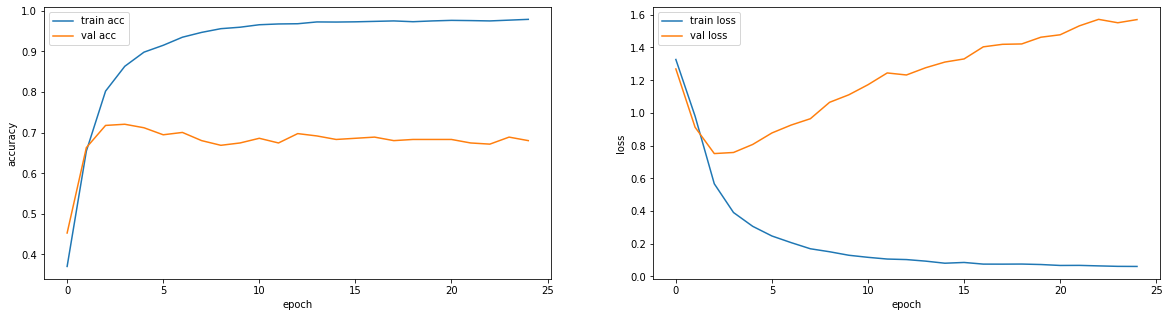

In [8]:
training_log = pd.DataFrame()
training_log = pd.read_csv("logs/training_log.csv")
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.set_size_inches(20, 5)

sns.lineplot(x=training_log.epoch, y=training_log.accuracy, ax=ax1, label='train acc')
sns.lineplot(x=training_log.epoch, y=training_log.val_accuracy, ax=ax1, label='val acc')
sns.lineplot(x=training_log.epoch, y=training_log.loss, ax=ax2, label='train loss')
sns.lineplot(x=training_log.epoch, y=training_log.val_loss, ax=ax2, label='val loss')
plt.legend()
plt.show()

The graphs above show the model improving during the 25 epochs of training - loss is decreasing and accuracy is increasing until it plateaus. However, we can see that both validation accuracy and loss closely follow their training counterparts for a few epochs but depart soon after, with accuracy being stable at around 0.7 and loss going from 0.8 to 1.6. This indicates that the model is failing to generalize over unseen data, in other words overfitting.

---
### ** >>> Exercise 7 (Take home): **  

Now, we have the word vectors, but our input data is a sequence of words (or say sentence). 
How can we utilize these "word" vectors to represent the sentence data and train our model?

In [9]:
from gensim.models import KeyedVectors

## Note: this model is very huge, this will take some time ...
model_path = "data/GoogleNews-vectors-negative300.bin"
w2v_google_model = KeyedVectors.load_word2vec_format(model_path, binary=True)

In [10]:
import gensim.downloader as api

## If you see `SSL: CERTIFICATE_VERIFY_FAILED` error, use this:
import ssl
import urllib.request
ssl._create_default_https_context = ssl._create_unverified_context

glove_twitter_25_model = api.load("glove-twitter-25")
print('load ok')

glove_twitter_25_model.most_similar('happy', topn=10)

load ok


[('birthday', 0.9577818512916565),
 ('thank', 0.937666654586792),
 ('welcome', 0.93361496925354),
 ('love', 0.9176183938980103),
 ('miss', 0.916450023651123),
 ('hello', 0.9158351421356201),
 ('thanks', 0.9150084257125854),
 ('merry', 0.9053248763084412),
 ('bless', 0.9027323126792908),
 ('wish', 0.9013165831565857)]

In [11]:
import numpy as np
def make_sentence_vector_google(row):
    n_words = 0
    sentence_vector = np.zeros(300)
    for word in row['unigrams']:
        try:
            sentence_vector  += w2v_google_model.get_vector(word)
            n_words += 1
            print(f'word {word} found') 
        except KeyError:
            pass
#             print(f'word {word} not found') 
    return sentence_vector / n_words

train_df['sentence_vector'] = train_df.apply(make_sentence_vector_google, axis=1)
test_df['sentence_vector'] = test_df.apply(make_sentence_vector_google, axis=1)
    
# Many words - especially emojis and named entities are not being found

word New found
word campaign found
word slogan found
word idea found
word I found
word know found
word I found
word deflect found
word We found
word country found
word divided found
word approach found
word could found
word fight found
word terrorism found
word pakistani found
word terrorism found
word Oh found
word god found
word Brewer found
word The found
word horror found
word horror found
word unknown found
word reason found
word I found
word try found
word discourage found
word awe found
word I found
word 'm found
word sorry found
word I found
word 2 found
word dogs found
word 3 found
word cats found
word amp found
word snake found
word oh found
word yeah found
word I found
word HATE found
word air found
word raid found
word I found
word n't found
word like found
word offense found
word I found
word 'm found
word fan found
word ole found
word miss found
word one found
word either found
word I found
word n't found
word like found
word statement found
word I found
word love found
w

word Just found
word terrible found
word cats found
word Wow found
word brother found
word grabbed found
word aggressive found
word manner found
word always found
word threw found
word tantrums found
word like found
word kid found
word knowing found
word express found
word I found
word thought found
word I found
word peeped found
word snap found
word That found
word homie found
word lol found
word come found
word let found
word make found
word em found
word hate found
word em found
word pout found
word face found
word Thank found
word teaching found
word live found
word It found
word long found
word since found
word amp found
word ride found
word exhilarating found
word I found
word know found
word Excited found
word nervous found
word Tuesday found
word klitschko found
word Klitschko found
word fury found
word day found
word boxing found
word It found
word I found
word 'm found
word hungry found
word food found
word panic found
word Back found
word forest found
word drama found
word F

word behavior found
word detest found
word This found
word terrific found
word unique found
word university found
word Athabasca found
word University found
word become found
word part found
word head found
word amp found
word part found
word heart found
word Peter found
word MacKinnon found
word I found
word gave found
word KENDRICK found
word LAMAR found
word eat found
word barbecue found
word hard found
word tell found
word pic found
word My found
word mistake found
word Either found
word way found
word nothing found
word I found
word said found
word initially found
word race found
word U found
word took found
word sad found
word ignorant found
word And found
word rich found
word Fumes found
word sullen found
word cheer found
word 'd found
word LVG found
word bribed found
word refs found
word Utd found
word personal found
word revenge found
word That found
word foul found
word prick found
word How found
word I found
word supposed found
word intimidate found
word freshman found
word 

<ipython-input-11-0e74d23749be>:13: RuntimeWarning: invalid value encountered in true_divide
  return sentence_vector / n_words



word Espinosa found
word ready found
word inspire found
word innovative found
word students found
word Scored found
word madden found
word vita found
word today found
word Bloke found
word n't found
word know found
word I found
word 'd found
word happily found
word paid found
word ever found
word bargain found
word bargain found
word vit found
word I found
word 'm found
word confident found
word NEVER found
word experience found
word successes found
word last found
word Best found
word hope found
word another found
word Bournemouth found
word sad found
word find found
word initiative found
word n't found
word even found
word thing found
word Part found
word buzzing found
word cheeky found
word NOT found
word IT found
word OUT found
word food found
word angry found
word omg found
word heard found
word dads found
word alarm found
word go found
word really found
word time found
word I found
word 'm found
word distraught found
word Candice found
word pout found
word piss found
word It fou

word gloomy found
word cold found
word No found
word gutted found
word dropped found
word one found
word earrings found
word sink found
word school found
word Rooney found
word Oh found
word dear found
word oh found
word dear found
word Fucking found
word dreadful found
word Depression found
word sucks found
word depression found
word guardian found
word realistic found
word probability found
word clown found
word might found
word next found
word president found
word clown found
word Somehow found
word sausage found
word pasta found
word I found
word made found
word sunk found
word bottom found
word I found
word 'm found
word eating found
word sausage found
word tiny found
word bit found
word leftover found
word pasta found
word Ca found
word n't found
word start found
word good found
word day found
word without found
word cup found
word tea found
word tea found
word day found
word Like found
word I found
word ca found
word n't found
word hours found
word worth found
word standing foun

word socialmedia found
word connector found
word ceo found
word writer found
word AI found
word EQ found
word security found
word tech found
word case found
word raging found
word moody found
word cow found
word lol found
word buy found
word moody found
word cow found
word socks found
word lol found
word Angelino found
word horrific found
word Drops found
word I found
word 'll found
word okay found
word n't found
word worry found
word How found
word Really found
word funny found
word lol found
word random found
word laugh found
word chair found
word despair found
word virgin found
word cafe found
word It found
word sad found
word man found
word leaves found
word work found
word little found
word bit found
word late found
word worst found
word fear found
word Did found
word get found
word stopped found
word police found
word All found
word doom found
word gloom found
word We found
word scored found
word open found
word play found
word And found
word conceded found
word two found
word ti

word end found
word disheartened found
word I found
word 'm found
word curious found
word know found
word much found
word money found
word original found
word Air found
word Bud found
word made found
word justify found
word continuation found
word awful found
word sequels found
word spinoffs found
word Have found
word n't found
word gotten found
word one found
word hour found
word sleep found
word Today found
word going found
word fun found
word day found
word restless found
word cobalt found
word woman found
word fairly found
word easily found
word Fair found
word cheeks found
word would found
word ignite found
word fiery found
word hue found
word Warm found
word cluck found
word cluck found
word cluck found
word wolf found
word wolf found
word wolf found
word chirp found
word chirp found
word chirp found
word I found
word ever found
word hear found
word ehhh found
word I found
word guess found
word I found
word want found
word everyone found
word I found
word 've found
word ever foun

word Travis found
word Scott found
word try found
word asking found
word cheeseburger found
word onion found
word amp found
word mustard found
word McDonalds found
word hilarious found
word Swear found
word guy found
word friends found
word scaredy found
word cats found
word You found
word n't found
word horror found
word movies found
word You found
word n't found
word haunted found
word houses found
word Wtf found
word reality found
word form found
word endless found
word tragedies found
word She found
word n't found
word know found
word react found
word first found
word frightened found
word repeat found
word another found
word You found
word find found
word way found
word top found
word I found
word found found
word first found
word episodes found
word Bojack found
word incredibly found
word funny found
word Then found
word got found
word less found
word funny found
word I found
word stayed found
word drama found
word LFC found
word What found
word awful found
word team found
word n

word concern found
word suspension found
word please found
word reactivate found
word never found
word violated found
word Support found
word Great found
word defender found
word terrible found
word positioning found
word Did found
word n't found
word know found
word without found
word Russel found
word shouting found
word mins found
word amp found
word Most found
word cities found
word Mr found
word Barr found
word coy found
word fact found
word YOURE found
word nervous found
word makes found
word want found
word crawl found
word hole found
word It found
word solemn found
word thing found
word small found
word scandal found
word Kingdom found
word see found
word God found
word children found
word starving found
word seated found
word Father found
word table found
word Tozer found
word pretty found
word average found
word klitschko found
word fury found
word Joshua found
word white found
word Want found
word start found
word biker found
word gang found
word together found
word GTA foun

word That found
word helping found
word burying found
word anxiety found
word WILL found
word manifest found
word another found
word way found
word Heart found
word disease found
word And found
word well found
word sparkling found
word Dr. found
word Rand found
word Paul found
word fueling found
word Middle found
word East found
word arms found
word race found
word worsening found
word already found
word horrific found
word refugee found
word crisis found
word Yemen found
word every found
word horror found
word movie found
word frightened found
word child found
word Halloween found
word movies found
word nightmare found
word I found
word 'm found
word getting found
word nervous found
word first found
word anatomy found
word exam found
word I found
word rabid found
word grizzly found
word bears found
word I found
word 'm found
word going found
word scatter found
word neighborhoods found
word 're found
word poor found
word refugees found
word yesss found
word apparently found
word 've fo

word scroll found
word social found
word media found
word another found
word father found
word taken found
word child found
word nightmare found
word everyday found
word regret found
word inconvenience found
word caused found
word We found
word noted found
word concern found
word We found
word get found
word touch found
word soon found
word discuss found
word Abhijit found
word Liam found
word distant found
word makes found
word mourn found
word Where found
word outrage found
word black found
word man found
word kills found
word another found
word black found
word man found
word streets found
word Boycotting found
word till found
word butter found
word pecan found
word comes found
word back found
word I found
word furious found
word RHOBH found
word want found
word assume found
word affair found
word married found
word criticize found
word awful found
word think found
word swallows found
word swifts found
word gone found
word Photo found
word 'd found
word 3 found
word nights found
wor

word I found
word watch found
word woman found
word pout found
word well found
word Way found
word cool found
word die found
word young found
word way found
word young found
word die found
word sober found
word im found
word tv found
word bully found
word would found
word call found
word nerd found
word would found
word rather found
word shove found
word one found
word thousand found
word nickels found
word right found
word earhole found
word go found
word new found
word york found
word comic found
word con found
word frowning found
word non found
word existent found
word face found
word Yeah found
word U found
word got found
word ta found
word make found
word HEEL found
word I found
word know found
word U found
word need found
word votes found
word U found
word wait found
word But found
word U found
word 're found
word really found
word wrath found
word Having found
word holiday found
word blues found
word Hope found
word instinct found
word reasoning found
word human found
word mind 

word SHOES found
word rage found
word The found
word important found
word characteristic found
word leadership found
word lack found
word fear found
word activism found
word equity found
word revolution found
word ok found
word ok found
word I found
word know found
word last found
word tweet found
word terrible found
word Sir found
word concern found
word whether found
word God found
word side found
word greatest found
word concern found
word God found
word side found
word God found
word always found
word right found
word Abraham found
word Lincoln found
word Listening found
word Joey found
word really found
word helps found
word anger found
word Still found
word ca found
word n't found
word log found
word fucking found
word snap found
word Just found
word got found
word back found
word seeing found
word Burslem found
word AMAZING found
word Face found
word still found
word hurts found
word laughing found
word much found
word Yo found
word kid found
word snap found
word chat found
word

word husband found
word lost found
word booked found
word apartment found
word Airbnb found
word n't found
word exist found
word n't found
word care found
word timid found
word determined found
word version found
word rabid found
word beasts found
word beyond found
word land found
word Growling found
word beneath found
word restrained found
word breath found
word I found
word If found
word angry found
word may found
word case found
word amp found
word may found
word unavoidable found
word see found
word sudden found
word excitement found
word become found
word sin found
word hitting found
word children found
word discipline found
word 're found
word quite found
word raging found
word hypocrite found
word 're found
word We found
word sadden found
word always found
word strive found
word bring found
word best found
word service found
word customer found
word We found
word always found
word CM found
word tend found
word going found
word get found
word infections found
word frowning found


word trainer found
word I found
word absolutely found
word love found
word anxiety found
word attack found
word halfway found
word family found
word meal found
word Why found
word come found
word Glasgow found
word night found
word I found
word working found
word I found
word fucking found
word gutted found
word waiting found
word appearance found
word ages found
word raging found
word Avanquest found
word unsubscribed found
word 3 found
word times found
word spam found
word emails found
word still found
word coming found
word STOP found
word THE found
word EMAILS found
word software found
word He found
word n't found
word many found
word chances found
word show found
word looked found
word lively found
word good found
word shot found
word tipped found
word bar found
word end found
word mourinho found
word worried found
word bringing found
word Ibra found
word Rushford found
word justinbieber found
word Thank found
word u found
word Justin found
word amazing found
word concert found
wo

word Kris found
word Theobald found
word joy found
word Did found
word miss found
word fact found
word swung found
word amp found
word hit found
word sister found
word JonBenet found
word face found
word golf found
word club found
word previously found
word fit found
word shut found
word hashtags found
word cool found
word One found
word step found
word long found
word work found
word visa found
word process found
word Relief found
word Onto found
word next found
word step found
word expat found
word using found
word nephew found
word meme found
word How found
word America found
word openly found
word embracing found
word racism found
word n't found
word know found
word I found
word n't found
word think found
word tell found
word LOL found
word awarded found
word F found
word bomb found
word trophy found
word serious found
word Are found
word horror found
word sites found
word would found
word interested found
word writing found
word guest found
word Been found
word really found
word c

word Down found
word replaced found
word Paul found
word Edwards found
word Quartet found
word Laurel found
word Bank found
word Park found
word Sat found
word 3pm found
word due found
word ill found
word health found
word jazz found
word blues found
word MC found
word listen found
word days found
word days found
word I found
word feel found
word gloomy found
word I found
word listen found
word ccm found
word spiritual found
word song found
word mode found
word BT found
word queue found
word minutes found
word Now found
word put found
word BT found
word Sport found
word dept found
word cancel found
word back found
word queue found
word shocking found
word I found
word 'd found
word rather found
word laugh found
word rarest found
word genius found
word beautiful found
word alliance found
word kept found
word sadness found
word melancholy found
word And found
word I found
word cried found
word front found
word guy found
word last found
word night found
word And found
word horrible found


word say found
word brilliant found
word Dr. found
word Hawking found
word rich found
word In found
word poorest found
word taste found
word Dunno found
word going found
word Yorkshire found
word scare found
word grounds found
word I found
word lasted found
word minute found
word Alton found
word towers found
word one found
word running found
word fire found
word exit found
word crying found
word The found
word 2nd found
word step found
word beating found
word anxiety found
word depression found
word waiting found
word .... found
word Take found
word action found
word Note found
word self found
word Stop found
word laughing found
word things found
word offend found
word ok found
word get found
word mad found
word people found
word offended found
word mad found
word upset found
word Ready found
word nice found
word breezy found
word calm found
word sunshine found
word Autumn found
word Really found
word ..... found
word Jumanji found
word 2 found
word .... found
word The found
word Rock

In [12]:
def make_sentence_vector_twitter(row):
    n_words = 0
    sentence_vector = np.zeros(25)
    for word in row['unigrams']:
        try:
            sentence_vector  += glove_twitter_25_model.get_vector(word)
            n_words += 1
        except KeyError:
            print(f'word {word} not found') 
    return sentence_vector / n_words

train_df['sentence_vector_2'] = train_df.apply(make_sentence_vector_twitter, axis=1)
test_df['sentence_vector_2'] = test_df.apply(make_sentence_vector_twitter, axis=1)

# Same problem here

word realDonaldTrump not found
word KellyannePolls not found
word New not found
word ... not found
word I not found
word I not found
word Trump2016 not found
word yourefired not found
word We not found
word MartyrsNotBeggars not found
word twlldun not found
word bbcquestiontime not found
word JacobReesMogg not found
word leicesterliz not found
word normanlamb not found
word CarolineLucas not found
word JuliaHB1 not found
word Oh not found
word Brewer not found
word The not found
word PeopleLikeMeBecause not found
word I not found
word BigDaddyx47 not found
word I not found
word I not found
word 2 not found
word 3 not found
word MannyM83 not found
word DareToReagan not found
word I not found
word HATE not found
word I not found
word Oregon/Baylor not found
word I not found
word ashleynwinters not found
word I not found
word I not found
word ContentwiththeLordsPortion not found
word O not found
word Ps not found
word 90:14 not found
word I not found
word 🔥Anger not found
word poured.🔥 no

word How not found
word I not found
word I not found
word Riding not found
word I not found
word SteveBryantArt not found
word I not found
word Golden not found
word Ticket not found
word Get not found
word Make not found
word Something not found
word Good not found
word Final not found
word I not found
word I not found
word DorH84607784 not found
word Oh not found
word FANTASTIC not found
word I not found
word 🤗😍 not found
word How not found
word I not found
word Murdered not found
word Your not found
word Mother not found
word SpookyTv not found
word My not found
word Ashleyavitia_ not found
word aidankerrpol not found
word I not found
word Get not found
word Prayers not found
word Protection not found
word Charlotte not found
word BrumSciComm not found
word What not found
word We not found
word Pakistan not found
word 50000 not found
word JudgeTedPoe not found
word Pre-prepare not found
word evolvement not found
word CMmyd not found
word PriiiincesssE not found
word 😂 not found
word

word Been not found
word Blanchardstown not found
word 2 not found
word I not found
word Marks not found
word Spencer not found
word veggiesausage not found
word ... not found
word .. not found
word Do not found
word no😝😝😝 not found
word Watch not found
word live.ly not found
word jaredhorgan not found
word marthalyssa not found
word LOL not found
word MoneyJay901 not found
word My not found
word Either not found
word I not found
word U not found
word With not found
word Ms_HeartAttack not found
word I not found
word What not found
word I not found
word NJDevils not found
word Probably not found
word OT not found
word I not found
word Absolutely not found
word WCH2016 not found
word TeamNA not found
word So not found
word Indian not found
word Uber not found
word N not found
word If not found
word I not found
word I not found
word Today not found
word LoriAlan1 not found
word Seriously not found
word Digging not found
word Muslims not found
word More not found
word Muslims not found
wo

<ipython-input-12-81f883ab87ea>:10: RuntimeWarning: invalid value encountered in true_divide
  return sentence_vector / n_words



word I not found
word 'No not found
word I not found
word India not found
word UNGA not found
word Pakistan not found
word Snores not found
word TL not found
word Boredom not found
word ArcadianLuthier not found
word Kei not found
word His not found
word Hey not found
word NASCAR not found
word Are not found
word Loudon not found
word Why not found
word New not found
word Day not found
word Diner not found
word 😂 not found
word Love not found
word Megan not found
word Kendall not found
word Jenner not found
word I not found
word 🤔🙃 not found
word cyran not found
word Mixed not found
word anxietymaybe not found
word missingfriends not found
word lostfriends not found
word wheresthetruefriends not found
word Kik not found
word I not found
word I not found
word Kik not found
word vsvplou not found
word Kik not found
word 'Congratulations not found
word Free not found
word 1 not found
word Then not found
word £34.80 not found
word Absolutely not found
word 😡 not found
word This not found


word DT not found
word GOP not found
word 4 not found
word We not found
word Are not found
word Source not found
word \n\n not found
word thoughtsbecomethings not found
word LIFE not found
word PleaseRT not found
word ProblemSolving not found
word airvistara not found
word bestinbusiness not found
word NativeApprops not found
word SBShear not found
word HuffingtonPost not found
word Shew not found
word That not found
word jamiesonhelen not found
word MarianKeyes not found
word I not found
word Uber_RSA not found
word ... not found
word Whether not found
word God not found
word Leeds not found
word .. not found
word She not found
word I not found
word never~ not found
word VerminEngineer not found
word Wow not found
word Denver not found
word 😢 not found
word FML not found
word Zen1dfabflake not found
word You not found
word jaymohr37 not found
word 'What not found
word I not found
word Yet not found
word 'personal not found
word Oblivion not found
word Trying not found
word 🤗 not found

word Groupon_UK not found
word I not found
word Clear not found
word Sky not found
word Holidays not found
word customerservicefail not found
word me🤗🤗 not found
word Pakistan not found
word Nawaz not found
word Sharif not found
word \nReally not found
word It not found
word UNGA not found
word jwolfie_ not found
word I not found
word I not found
word 😩 not found
word There not found
word 'to not found
word do'.doc not found
word As not found
word HoustonTexans not found
word ... not found
word Texans not found
word Everything not found
word –George not found
word Addair not found
word ThursdayThoughts not found
word yourpushfactor not found
word I not found
word 100000000 not found
word I not found
word KekePalmer not found
word smoothkobra not found
word 2 not found
word Thanks not found
word Depression not found
word FOXTV not found
word BONESonFOX not found
word 3 not found
word note7 not found
word ... not found
word What not found
word 2hour not found
word waittime not found
word

word Is not found
word Mr. not found
word TY not found
word Rex not found
word When not found
word The_Nasty_P not found
word Sugarboy not found
word Hulu not found
word From not found
word I not found
word I not found
word realDonaldTrump not found
word My not found
word I not found
word The not found
word We not found
word It not found
word it.\n not found
word footballmcd not found
word Memphis not found
word I not found
word Natalie not found
word The not found
word RealJeffsdomain not found
word Wolfpack not found
word INCIndia not found
word Oh not found
word INC not found
word I not found
word BJP not found
word BJP4India not found
word madihayousufzai not found
word Please not found
word DM not found
word BB18 not found
word It not found
word jessebwatters not found
word Love not found
word Juan not found
word Keep not found
word Lol not found
word ManUtd not found
word Rooney not found
word Absolutely not found
word 🙈🙈🙈 not found
word carras16 not found
word carras16 not found

word I not found
word I not found
word I not found
word The not found
word PanicAtTheDisco not found
word Brendonati not found
word GAMEDAY not found
word VS not found
word BUFORD not found
word TODAY not found
word AT not found
word 5:30 not found
word AT not found
word HOME not found
word NEVER not found
word BEEN not found
word SO not found
word EXCITED not found
word Accept not found
word -George not found
word S. not found
word Patton not found
word ImpugnValkyrie not found
word I not found
word Angela not found
word I not found
word And not found
word I not found
word I not found
word berniedole not found
word But not found
word Rohan not found
word ... not found
word Watch not found
word live.ly not found
word flydudern not found
word Absolutely not found
word prebooked not found
word 😡 not found
word FoRDaYS14 not found
word 😳 not found
word arcdental not found
word From not found
word I not found
word I not found
word realDonaldTrump not found
word Gloriosa not found
word Bazi

word ExpressScripts not found
word embrrssd not found
word 3-5 not found
word Not not found
word expressscripts not found
word I not found
word It not found
word TweeriaLee not found
word A not found
word Well not found
word AprilDRyan not found
word Trump not found
word 2 not found
word U not found
word King not found
word it.\n not found
word JoyAnnReid not found
word SMShow not found
word frangeladuo not found
word I not found
word I not found
word Blancalanka96 not found
word I not found
word LFScott57 not found
word Miss not found
word Cookie not found
word She not found
word She not found
word Got not found
word First not found
word It not found
word When not found
word GoogleMaps not found
word blondmoment not found
word I not found
word Mary not found
word You not found
word GBBO not found
word This not found
word I not found
word 😂😂 not found
word I not found
word spokeword not found
word chenaidavid not found
word It not found
word 'Oh not found
word Did not found
word The no

word ... not found
word WHATEVER not found
word ... not found
word ElKracken not found
word gottawearshades not found
word LetsGoYankees not found
word If not found
word Dutch not found
word 🍁🍾 not found
word ... not found
word I not found
word I not found
word desgusting not found
word I not found
word OC_Transpo not found
word 12 not found
word Democracy not found
word work\n not found
word I not found
word tunaeP_ not found
word up☺️ not found
word BlurtAlerts not found
word 'the not found
word Totemprince not found
word I not found
word Be not found
word Do not found
word LORD not found
word God not found
word Not not found
word mustache_harbor not found
word TiburonChamber not found
word yachtrock not found
word mustacheharbor not found
word DanRather not found
word What not found
word King not found
word The not found
word w/ not found
word Don not found
word ChrisChristie not found
word You not found
word Police not found
word credentials-You not found
word litigator not found
w

word Bout not found
word dontbreathe not found
word WarrenTheaters not found
word icantholdmybreaththatlong not found
word SSheil not found
word Ulzana not found
word Raid not found
word Hate not found
word 🙃🙃 not found
word I not found
word nopanicattack not found
word mikefreemanNFL not found
word \nIs not found
word OBrien not found
word Chalk not found
word ARwuEVfqv not found
word I not found
word Rawhide not found
word yungdoujin not found
word Barcabhoy1 not found
word Of not found
word Did not found
word Forrester not found
word Good not found
word CX not found
word Thanks not found
word Lakis not found
word Court not found
word Hotel not found
word pmo100 not found
word 5liveSport not found
word ..... not found
word I not found
word He not found
word tomlinmayniac not found
word A not found
word OHSOVICTORIOUS_ not found
word FaZeAdapt not found
word We not found
word .. not found
word But not found
word Instagram not found
word Adapts not found
word 😂😂😂 not found
word chutney

training accuracy: 0.88
testing accuracy: 0.71
----------------------------
              precision    recall  f1-score   support

       anger       0.67      0.65      0.66        84
        fear       0.72      0.76      0.74       110
         joy       0.74      0.78      0.76        79
     sadness       0.72      0.64      0.68        74

    accuracy                           0.71       347
   macro avg       0.71      0.71      0.71       347
weighted avg       0.71      0.71      0.71       347



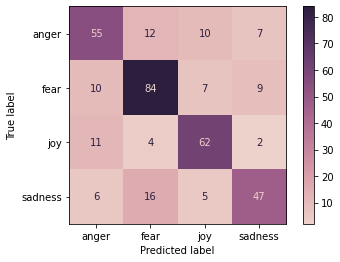

In [14]:
from sklearn.svm import SVC

X_train = train_df['sentence_vector'].apply(pd.Series).fillna(0)
y_train = train_df['emotion']

X_test = test_df['sentence_vector'].apply(pd.Series).fillna(0)
y_test = test_df['emotion']

google_model = SVC()
google_model = google_model.fit(X_train, y_train)

y_train_pred = google_model.predict(X_train)
y_test_pred = google_model.predict(X_test)

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))
print('----------------------------')
print(classification_report(y_true=y_test, y_pred=y_test_pred))
plot_confusion_matrix(google_model, X_test, y_test, cmap=sns.cubehelix_palette(as_cmap=True))

training accuracy: 0.51
testing accuracy: 0.47
----------------------------
              precision    recall  f1-score   support

       anger       0.46      0.37      0.41        84
        fear       0.45      0.67      0.54       110
         joy       0.54      0.57      0.55        79
     sadness       0.45      0.19      0.27        74

    accuracy                           0.47       347
   macro avg       0.47      0.45      0.44       347
weighted avg       0.47      0.47      0.45       347



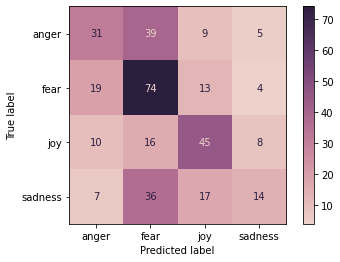

In [15]:
X_train = train_df['sentence_vector_2'].apply(pd.Series).fillna(0)
y_train = train_df['emotion']

X_test = test_df['sentence_vector_2'].apply(pd.Series).fillna(0)
y_test = test_df['emotion']

twitter_model = SVC()
twitter_model = twitter_model.fit(X_train, y_train)

y_train_pred = twitter_model.predict(X_train)
y_test_pred = twitter_model.predict(X_test)

acc_train = accuracy_score(y_true=y_train, y_pred=y_train_pred)
acc_test = accuracy_score(y_true=y_test, y_pred=y_test_pred)

print('training accuracy: {}'.format(round(acc_train, 2)))
print('testing accuracy: {}'.format(round(acc_test, 2)))
print('----------------------------')
print(classification_report(y_true=y_test, y_pred=y_test_pred))
plot_confusion_matrix(twitter_model, X_test, y_test, cmap=sns.cubehelix_palette(as_cmap=True))

The google model does a lot better than the twitter one, probably because of the different dimensionality; averaging the word vectors will lead to information loss, and the negative effect is more pronounced with few dimensions.

---
### ** >>> Exercise 8 (Take home): **  

Generate a t-SNE visualization to show the 15 words most related to the words "angry", "happy", "sad", "fear" (60 words total).

In [16]:
word_list = ['happy', 'angry', 'sad', 'fear']

topn = 15
happy_words = ['happy'] + [word_ for word_, sim_ in w2v_google_model.most_similar('happy', topn=topn)]
angry_words = ['angry'] + [word_ for word_, sim_ in w2v_google_model.most_similar('angry', topn=topn)]        
sad_words = ['sad'] + [word_ for word_, sim_ in w2v_google_model.most_similar('sad', topn=topn)]        
fear_words = ['fear'] + [word_ for word_, sim_ in w2v_google_model.most_similar('fear', topn=topn)]        

print('happy_words: ', happy_words)
print('angry_words: ', angry_words)
print('sad_words: ', sad_words)
print('fear_words: ', fear_words)

target_words = happy_words + angry_words + sad_words + fear_words
print('\ntarget words: ')
print(target_words)

print('\ncolor list:')
cn = topn + 1
color = ['b'] * cn + ['g'] * cn + ['r'] * cn + ['y'] * cn
print(color)

happy_words:  ['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited', 'happier', 'Said_Hirschbeck', 'elated', 'thankful', 'unhappy']
angry_words:  ['angry', 'irate', 'enraged', 'indignant', 'incensed', 'annoyed', 'agitated', 'frustrated', 'furious', 'unhappy', 'outraged', 'livid', 'irritated', 'exasperated', 'angrier', 'Angry']
sad_words:  ['sad', 'saddening', 'Sad', 'saddened', 'heartbreaking', 'disheartening', 'Meny_Friedman', 'parishioner_Pat_Patello', 'saddens_me', 'distressing', 'reminders_bobbing', 'Turkoman_Shiites', 'saddest', 'unfortunate', 'sorry', 'bittersweet']
fear_words:  ['fear', 'fearful', 'fears', 'Fear', 'fearing', 'worry', 'dread', 'feared', 'anxiety', 'apprehension', 'afraid', 'worries', 'concern', 'distrust', 'worried', 'Fearful']

target words: 
['happy', 'glad', 'pleased', 'ecstatic', 'overjoyed', 'thrilled', 'satisfied', 'proud', 'delighted', 'disappointed', 'excited', 'happier', 'Said_Hirsc

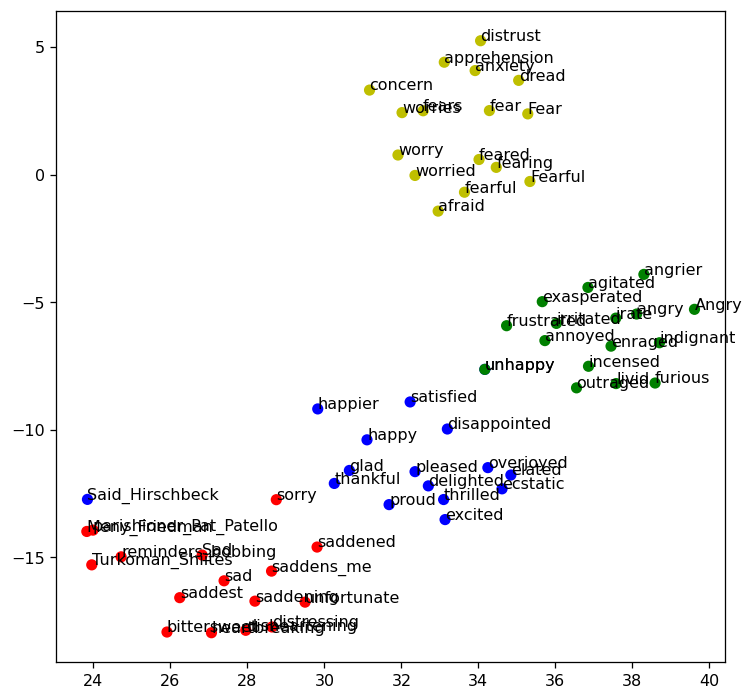

In [17]:
%matplotlib inline
from sklearn.manifold import TSNE

## w2v model
model = w2v_google_model

## prepare training word vectors
size = 500
target_size = len(target_words)
all_word = list(model.vocab.keys())
word_train = target_words + all_word[:size]
X_train = model[word_train]

## t-SNE model
tsne = TSNE(n_components=2, metric='cosine', random_state=28)

## training
X_tsne = tsne.fit_transform(X_train)

## plot the result
plt.figure(figsize=(7.5, 7.5), dpi=115)
plt.scatter(X_tsne[:target_size, 0], X_tsne[:target_size, 1], c=color)
for label, x, y in zip(target_words, X_tsne[:target_size, 0], X_tsne[:target_size, 1]):
    plt.annotate(label, xy=(x,y), xytext=(0,0),  textcoords='offset points')
plt.show()

There is an outlier "Said_Hirschbeck" (?), which for other values of 'size' ends up much closer to the 'sad' cluster than to the 'happy' one, but other than that, we can see well-separated clusters.

### ** >>> Report for DM2020 competition **  

Fisrt, some data exploration. For performance reasons I'll only show results for 100000 records.

In [18]:
import pandas as pd
import json
import functools
import emoji
import functools
import operator
import re

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.max_colwidth', 1000)

In [19]:
data_id  = pd.read_csv('./data/data_identification.csv')
emo = pd.read_csv('./data/emotion.csv')

tweets_str = open('./data/tweets_DM.json').read()
tweets_str = "[" + tweets_str.replace("}\n{", "}\n,{") + "]"
tweets = json.loads(tweets_str)
tweet_df = pd.DataFrame(tweets[:100000])
source = pd.DataFrame(list(tweet_df._source.apply(lambda x: x['tweet']).values))

/home/manu/PycharmProjects/data_mining/venv/lib/python3.8/site-packages/seaborn/distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='_score', ylabel='Density'>

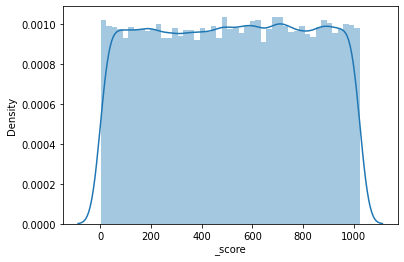

In [20]:
import seaborn as sns

sns.distplot(tweet_df._score)

We can see that score is uniformly distributed across the tweets, so we can discard it from the prediction.

In [21]:
print(tweet_df['_index'].value_counts())
print(tweet_df['_type'].value_counts())

hashtag_tweets    100000
Name: _index, dtype: int64
tweets    100000
Name: _type, dtype: int64


In [22]:
tweet_df = pd.concat([tweet_df, source], axis=1).drop(['_source','_type','_index'], axis=1)

Index and type only contain one value, so they are useless.

In [23]:
tweet_df['hashtags'].apply(pd.Series)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
0,Snapchat,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,freepress,TrumpLegacy,CNN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,bibleverse,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99996,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99997,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
99998,Tlou,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Most records don't have hashtags. Additionaly, all the hashtags are present in the text, so they don't provide additional information and can be ignored.

In [24]:
tweet_df = tweet_df.merge(data_id, left_on='tweet_id', right_on='tweet_id')
tweet_df = tweet_df.merge(emo, how='left')

In [25]:
tweet_df['text'].head()

0                                                          People who post "add me on #Snapchat" must be dehydrated. Cuz man.... that's <LH>
1                             @brianklaas As we see, Trump is dangerous to #freepress around the world. What a <LH> <LH> #TrumpLegacy.  #CNN
2      Confident of your obedience, I write to you, knowing that you will do even more than I ask. (Philemon 1:21) 3/4 #bibleverse <LH> <LH>
3                                                                                                        Now ISSA is stalking Tasha 😂😂😂 <LH>
4    "Trust is not the same as faith. A friend is someone you trust. Putting faith in anyone is a mistake." ~ Christopher Hitchens <LH> <LH>
Name: text, dtype: object

Lots of records contain a "\<LH\>" sequence, which should be removed. We can also see that the data is not very clean; there are grammatical and orthographical errors, different types of text (e.g. comment and quotation from the Bible), lots of emojis and special characters.

<AxesSubplot:ylabel='emotion'>

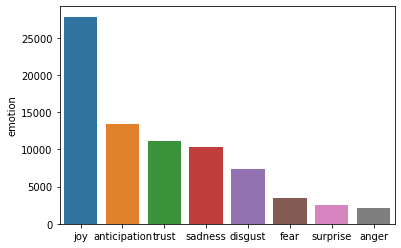

In [26]:
import seaborn as sns

sns.barplot(x=tweet_df['emotion'].value_counts().index, y=tweet_df['emotion'].value_counts())

In [27]:
from utils import split_dataset

train, test = split_dataset(tweet_df)

Train: (70368, 7), test: (7819, 7)


In [28]:
train[train['emotion'].isin(['trust', 'anticipation'])].sample(10)[['text', 'emotion']]

,text,emotion
36300,CVR is at the UK200Group <LH> #Breakfast this morning at @TheBarnGreatTey #networking #Essex,trust
39130,Rainy day in the city! <LH> #rainbabyrain ☔️,anticipation
44251,"SBI wins the Golden Peacock Award for Excellence in Corporate Governance, 2017. Shri. Dinesh Khara, MD seen receiving the award. <LH>",trust
77102,@caitlyn_davies @dionnelouise03 @emilyjames1499 <LH> for Emily Catrin,anticipation
67848,"Dear World: We’re not totally crazy. Just hang on. Love, America <LH> #freedom #nomorefascists",trust
89348,Let’s crush the Dodgers spirit with another win tonight! #FlyTheW <LH> #GoCubsGo #LETSWINTWO,anticipation
991,@Derrick16392665 Thank you VERY much for your service and for the follow fellow Patriot! <LH> <LH> <LH> <LH> <LH> 🇺🇸,anticipation
87028,<LH> in yourself cos no one knows you better than #YOURSELF — feeling excited,anticipation
89581,Patiently awaiting #TheDivineComedy I think it’s going to be a great evening <LH>,anticipation
53344,a week of ☀️🌊🍸👙🏝 and my little pal 😍 @tomloxam <LH>,anticipation


In [29]:
print(f'Max Tweet length: {train_df["text"].apply(len).max()}')
print(f'Min Tweet length: {train_df["text"].apply(len).min()}')
print(f'Mean Tweet length: {train_df["text"].apply(len).mean()}')
print(f'STD Tweet length: {train_df["text"].apply(len).std()}')

Max Tweet length: 160
Min Tweet length: 7
Mean Tweet length: 95.1549958483255
STD Tweet length: 37.065859803752026


We can also see that for some more ambigous emotions, the labels are not perfect.

For the first attempt at classification, I'm gonna use TDIDF. I'll start with cleaning the text.

In [30]:
from utils import preprocess

stopwords = nltk.corpus.stopwords.words("english")

tweet_df['clean_text'] = tweet_df['text'].apply([lambda x: preprocess(
    x,
    flg_lemm=True,
    flg_remove_punctuation=True,
    flg_remove_urls=True,
    flg_remove_emojis=True,
    flg_remove_hashtags=False,
    flg_remove_mentions=False,
    lst_stopwords=stopwords
)])

I preprocessed text by applying all the standard methods: lemmatization, removing stopwords and puntuation. I tried removing hashtags and mentions as well, but saw the performance decrease.

In [31]:
from sklearn import naive_bayes, ensemble, feature_extraction, metrics
from utils import select_features, split_dataset

n_features = 100000
ngram_range = (1, 2)
threshold = 0.99999

train, test = split_dataset(tweet_df)

## get target
y_train = train["emotion"].values
y_test = test["emotion"].values

# train, y_train = undersample(train, y_train)

X_train = train['clean_text']
X_test = test['clean_text']

# model = naive_bayes.MultinomialNB(alpha=1)
model = ensemble.RandomForestClassifier()

vect = feature_extraction.text.TfidfVectorizer

# Select most useful features using chi-squared
X_train_vect, vocab, vectorizer = select_features(
    X_train=X_train,
    y_train=y_train,
    vect=vect,
    n_features=n_features,
    ngram_range=ngram_range,
    threshold=threshold
)

Train: (70368, 8), test: (7819, 8)
Whole vocabolary 100000
# anger:
  . selected features: 384
  . top features: 00,00 aug,00 jul,00 oct,00 sep,anamorphic,anger,annoyed,aug,aug usd
 
# anticipation:
  . selected features: 164
  . top features: 15am,15pm,30am,45am,45pm,august,believe,christ,come,come august
 
# disgust:
  . selected features: 65
  . top features: disgusting,dumb,gross,nasty,shame,stupid,wtf,yuck,numb,lame
 
# fear:
  . selected features: 270
  . top features: bitch,daniel,dro,episode,fear,friday th,halloween,hbo,hoe,insecure
 
# joy:
  . selected features: 114
  . top features: beautiful,birthday,blessed,buy,buy lot,closed,closed buy,closed sell,corinthian 13,eurusd
 
# sadness:
  . selected features: 129
  . top features: confused,disappointed,fifth,fifth harmony,fifthharmony,fifthharmony song,harmony,matthardybrand,mostrequestlive,mostrequestlive onairromeo
 
# surprise:
  . selected features: 308
  . top features: aesthetic,aesthetic macaroni,book knowledge,call h3h3

Create TDIDF vectors with a maximum number of words; then select most relevant features filtering by those that have the highest chi-squared with the label.
For the vectorizer I used 1 and 2 grams.

We can see that some of the selected features make a lot of sense, while other are more puzzling.


I tried undersampling because of the strong class imbalance, but i found out that the classifier I used are quite good at handling class imbalance. So in the end undersampling just ened up removing a lot of data, hence making the performance worse.

Training f1-score: 0.5214308289103738
F1-score: 0.45
Auc: 0.74
Detail:
              precision    recall  f1-score   support

       anger       0.46      0.19      0.27       198
anticipation       0.60      0.43      0.50      1374
     disgust       0.48      0.21      0.29       705
        fear       0.65      0.30      0.41       360
         joy       0.44      0.84      0.58      2775
     sadness       0.59      0.31      0.40      1022
    surprise       0.47      0.16      0.24       261
       trust       0.50      0.19      0.27      1124

    accuracy                           0.48      7819
   macro avg       0.52      0.33      0.37      7819
weighted avg       0.51      0.48      0.45      7819



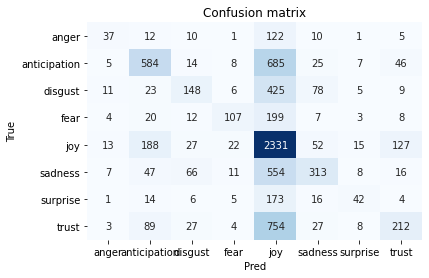

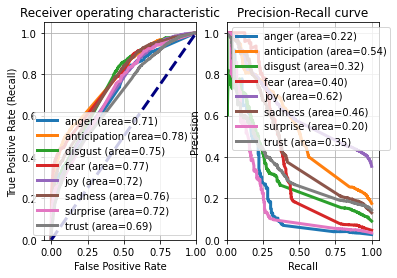

In [32]:
from utils import evaluate

X_test_vect = vectorizer.transform(X_test)

model.fit(X_train_vect, y_train)

y_train_pred = model.predict(X_train_vect)
f1_train = metrics.f1_score(y_true=y_train, y_pred=y_train_pred, average='macro')
print(f"Training f1-score: {f1_train}")

predicted = model.predict(X_test_vect)
predicted_prob = model.predict_proba(X_test_vect)

evaluate(y_test, predicted, predicted_prob)

The performance isn't great, but we can already see some patterns:
'anticipation' and 'trust are often predicted as 'joy' and vice-versa. 
'joy' achieves the best f1-score, whereas 'anger' and 'surprise' get the lowest. This matches the number of occurrences per class.

I tried different parameters and different classifiers, but saw little to no improvement to the performance. So I've decided to make use of language models, in this case BERT.

In [33]:
import numpy as np
import emoji
import tensorflow as tf
import transformers

from utils import load_data, split_dataset, clean_text

df = load_data(100000)
df = clean_text(df)

(100000, 7) records loaded


In [34]:
df[['text', 'emotion']].sample(10)

,text,emotion
79633,with # blessings of amen .,joy
33930,the car never backed up and rammed the crowd a 2nd time . and there was plenty of violence prior as well # badjournalism,sadness
48458,"to rise means to ascend , mount up , climb , progress , grow and proceed . stop looking outward , look inward and discover the you in you .",joy
18801,"just ate some oats , check the date and there 6 month out of date",joy
84659,that ' s simply beautiful !,fear
8430,to see another day,joy
32118,"wild 92 . 9 , we put out # indie # house , and # futuremusic , but without you ... it ' s just silence ! thanks for the # follow ! # indiemusic # new …",joy
46944,# shirazconcerts heloo gamara girl # shirazlb # you,joy
60976,"it ' s 2017 , brent is <$ 60 for 2y , airline # tourist class # legroom is in cardiovascular ☠️ zone & # seat # prices too - # wtf ? 😡",disgust
8626,just came back from # studiocycling at # lifetime # workhardplayhard,trust


BERT is a much more complex model, so I tried a different, less aggressive data cleaning approach, with the assumtpion that BERT could better use of the textual information, even if not perfect. 
Still, I remove the '<LH>' character, 'http', '@' and other special characters.
Moreover, I set all the text to lowercase and remove additional whitespaces.

In [35]:
train, validation = split_dataset(df)
test = df[df['identification'] == 'test']

Train: (70368, 7), test: (7819, 7)


In [36]:
tokenizer = transformers.DistilBertTokenizerFast.from_pretrained('distilbert-base-uncased')
tokenizer.add_tokens([x[:1] for x in emoji.UNICODE_EMOJI.keys()])

1290

I use BERT's tokenizer, but modify it to add emojis - assuming that they are an important feature of sentiment analysis. The important of emojis in casual, conversational language is suggested in this paper: https://arxiv.org/pdf/1910.13793.pdf.

In [37]:
train_encodings = tokenizer(list(train['text']), truncation=True, padding=True)
val_encodings = tokenizer(list(validation['text']), truncation=True, padding=True)
test_encodings = tokenizer(list(test['text']), truncation=True, padding=True)

In [38]:
r = int(np.random.rand() * len(train_encodings[:]))
for i in range(r, r+5):
    print(train_encodings[i].tokens)

['[CLS]', 'pay', 'your', '#', 'dept', 'to', 'for', 'the', 'shed', '##ding', 'of', 'his', 'blood', 'on', 'cal', '##vary', ',', 'by', 'and', 'accept', 'him', 'as', 'ur', 'and', '#', 'sa', '##vio', '##ur', 'and', 'be', 'baptised', '.', '[SEP]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]', '[PAD]']
['[CLS]', 'first', 'ever', 'viking', 'game', ',', 'and', 'i', 'don', '##t'

In [39]:
y_train = list(train['emotion'])
y_val = list(validation['emotion'])

In [40]:
dic_y_mapping = {n:label for n,label in enumerate(np.unique(y_train))}
inverse_dic = {v:k for k,v in dic_y_mapping.items()}

In [41]:
train_dataset = tf.data.Dataset.from_tensor_slices((
    dict(train_encodings),
    [inverse_dic[y] for y in y_train]
))
val_dataset = tf.data.Dataset.from_tensor_slices((
    dict(val_encodings),
    [inverse_dic[y] for y in y_val]
))
test_dataset = tf.data.Dataset.from_tensor_slices((
    dict(test_encodings),
    list(np.zeros(test.shape[0])) # Use dummy labels just to keep the structure the same
))

After tokenizing the test (training, validation and test), I create Tensorflow Datasets by combining features and labels.

In [42]:
model = transformers.TFDistilBertForSequenceClassification.from_pretrained(
    'distilbert-base-uncased', num_labels=8)

batch_size = 128
optimizer = tf.keras.optimizers.Adam(learning_rate=5e-6)

model.resize_token_embeddings(len(tokenizer))
model.compile(optimizer=optimizer, loss=model.compute_loss, metrics=['accuracy'])
model.summary()

Some layers from the model checkpoint at distilbert-base-uncased were not used when initializing TFDistilBertForSequenceClassification: ['vocab_projector', 'vocab_transform', 'vocab_layer_norm', 'activation_13']
- This IS expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFDistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some layers of TFDistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['dropout_19', 'pre_classifier', 'classifier']
You should probably TRAIN this model on a down-stream task to be able to use i

Model: "tf_distil_bert_for_sequence_classification"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
distilbert (TFDistilBertMain multiple                  67353600  
_________________________________________________________________
pre_classifier (Dense)       multiple                  590592    
_________________________________________________________________
classifier (Dense)           multiple                  6152      
_________________________________________________________________
dropout_19 (Dropout)         multiple                  0         
Total params: 67,950,344
Trainable params: 67,950,344
Non-trainable params: 0
_________________________________________________________________


The idea here is to take pretrained BERT embeddings, and only train the last classifier layers using our data.
Notice I need to resize the token embeddings to make space for the emojis added earlier.

In [ ]:
training = model.fit(
    train_dataset.shuffle(1000).batch(batch_size),
    validation_data=val_dataset.shuffle(1000).batch(batch_size),
    epochs=5,
    batch_size=batch_size, 
    verbose=2
)

Epoch 1/5
Instructions for updating:
The `validate_indices` argument has no effect. Indices are always validated on CPU and never validated on GPU.
550/550 - 153s - loss: 1.6203 - accuracy: 0.4157 - val_loss: 1.4320 - val_accuracy: 0.4790
Epoch 2/5
550/550 - 152s - loss: 1.3955 - accuracy: 0.4982 - val_loss: 1.3483 - val_accuracy: 0.5164
Epoch 3/5
550/550 - 147s - loss: 1.3044 - accuracy: 0.5349 - val_loss: 1.2936 - val_accuracy: 0.5401
Epoch 4/5
550/550 - 147s - loss: 1.2353 - accuracy: 0.5623 - val_loss: 1.2597 - val_accuracy: 0.5531
Epoch 5/5


We can see a significant increase in performance, but the training time increases considerably as well.

In [ ]:
y_pred = model.predict(test_dataset.batch(batch_size))
prediction_label = [dic_y_mapping[np.argmax(p)] for p in tf.nn.softmax(y_pred.logits, axis=1).numpy()]

As a last step we predict labels for the test data, and extract the textual class labels.

There are many more things we can try to improve performance using BERT, like changing training hyperparameters (learning rate, loss, etc...) or experiment with different levels of preprocessing/cleaning.
For example, I noticed that BERT breaks down many words it doesn't know into subwords, possibly creating noise. We could find the ones that occur most often in the data (e.g. 'ahahahah', 'ohmygod', 'therealtrump', etc...) and add them to the tokenizer.

Unfortunately, I switched to using BERT too late to fully explore all these possibilities; from this I learned I need to be more flexible about the methods I use, especially when there is a time limit. If I had used BERT from the start, I would have surely achieved much better results.

Another idea I haven't had the chance to play with is hierarchical classification: since we have such a high number of examples tagged as 'joy', we could first train a classifier to discern 'joy' from other emotions, and then learn another classifier to predict the reamining emotions.